In [1]:
import pandas as pd

df = pd.read_csv('/content/Iris.csv')
display(df.head())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = df.drop(['Id', 'Species'], axis=1)
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
display(scaled_df.head())

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [3]:
from sklearn.model_selection import train_test_split

X = scaled_df
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (120, 4)
Shape of X_test: (30, 4)
Shape of y_train: (120,)
Shape of y_test: (30,)


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_scores = []
k_values = range(1, 11)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred_best = best_knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_best)

print(f"Accuracy scores for different K values: {accuracy_scores}")
print(f"Best K value: {best_k}")
print("Confusion Matrix for the best K:")
print(conf_matrix)

Accuracy scores for different K values: [0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Best K value: 2
Confusion Matrix for the best K:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


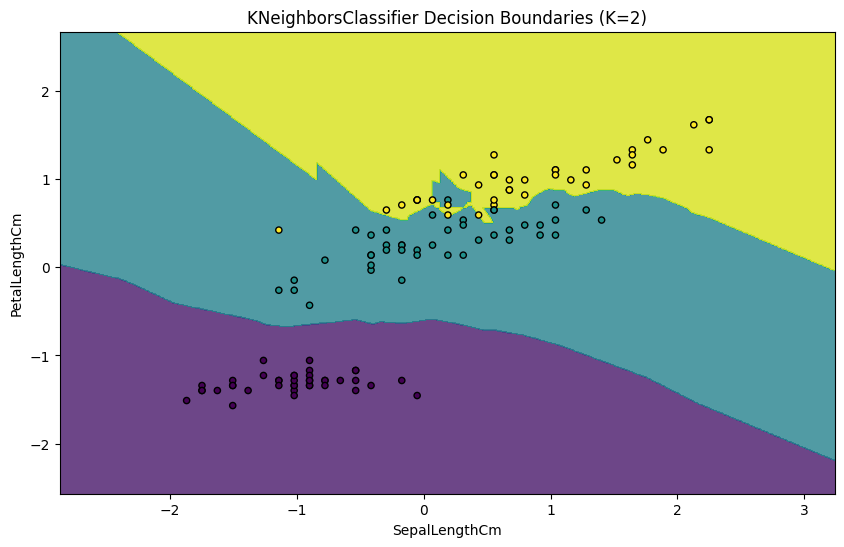

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Select two features for visualization
X_train_2features = X_train[['SepalLengthCm', 'PetalLengthCm']]
X_test_2features = X_test[['SepalLengthCm', 'PetalLengthCm']]

# Encode the species labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


# Train a new KNN model on the two selected features with encoded labels
best_knn_2features = KNeighborsClassifier(n_neighbors=best_k)
best_knn_2features.fit(X_train_2features, y_train_encoded)

# Create a meshgrid using the two selected features
x_min, x_max = X_train_2features.iloc[:, 0].min() - 1, X_train_2features.iloc[:, 0].max() + 1
y_min, y_max = X_train_2features.iloc[:, 1].min() - 1, X_train_2features.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict classes for the meshgrid points
Z = best_knn_2features.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create contour plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8)

# Create scatter plot of training data with encoded labels
scatter = plt.scatter(X_train_2features.iloc[:, 0], X_train_2features.iloc[:, 1], c=y_train_encoded, edgecolors='k', s=20)

# Add labels and title
plt.xlabel(X_train_2features.columns[0])
plt.ylabel(X_train_2features.columns[1])
plt.title(f'KNeighborsClassifier Decision Boundaries (K={best_k})')

# Display the plot
plt.show()

## Summary:

### Data Analysis Key Findings

* The Iris dataset was successfully loaded and its features were normalized using `StandardScaler`.
* The dataset was split into training (80%) and testing (20%) sets.
* A KNeighborsClassifier model was trained and evaluated for K values ranging from 1 to 10.
* The model achieved the highest accuracy of 1.0 on the test set when K was 2.
* The confusion matrix for K=2 showed perfect classification on the test set, with 10 instances of the first class, 9 of the second, and 11 of the third class correctly predicted.
* The decision boundaries for the model with the best K (K=2) were visualized using two features: 'SepalLengthCm' and 'PetalLengthCm'.

### Insights or Next Steps

* The KNeighborsClassifier model performs very well on this dataset, achieving perfect accuracy on the test set with K=2.
* Further analysis could involve exploring other classification algorithms and comparing their performance to the KNeighborsClassifier to see if similar or better results can be achieved.
